In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from pathlib import Path

In [2]:
# Import data
amazon_data = Path('C:/Users/cedet/OneDrive/Desktop/amazon_data_cleaned1.csv')

print(amazon_data)

C:\Users\cedet\OneDrive\Desktop\amazon_data_cleaned1.csv


In [3]:
# Read in data
amazon_df = pd.read_csv(amazon_data)

# Display the first 3 rows of the dataframe
display(amazon_df.head(3))

,Category Name,Product Description,Price,Stars,Best Seller,Product Volume,Total Spend
0,Suitcases,"Sion Softside Expandable Roller Luggage,",139.99,4.5,False,2000,279980.0
1,Suitcases,Luggage Sets Expandable PC+ABS Durable S,169.99,4.5,False,1000,169990.0
2,Suitcases,Platinum Elite Softside Expandable Check,365.49,4.6,False,300,109647.0


In [4]:
amazon_df.dtypes

Category Name           object
Product Description     object
Price                  float64
Stars                  float64
Best Seller               bool
Product Volume           int64
Total Spend            float64
dtype: object

In [5]:
# Define thresholds for categorizing star ratings
thresholds = [1.9, 2.9, 3.9, 4.9]

# Function to map star ratings to categories
def map_to_category(star_rating):
    if star_rating <= thresholds[0]:
        return 'Category 1'
    elif star_rating <= thresholds[1]:
        return 'Category 2'
    elif star_rating <= thresholds[2]:
        return 'Category 3'
    elif star_rating <= thresholds[3]:
        return 'Category 4'
    else:
        return 'Category 5'

In [6]:
# Apply mapping to Stars column (This is your target variable)
amazon_df['Stars'] = amazon_df['Stars'].apply(map_to_category)

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()

amazon_df['Category Name'] = label_encoder.fit_transform(amazon_df['Category Name'])
amazon_df['Product Description'] = label_encoder.fit_transform(amazon_df['Product Description'])
amazon_df['Best Seller'] = label_encoder.fit_transform(amazon_df['Best Seller'])
amazon_df['Stars'] = label_encoder.fit_transform(amazon_df['Stars'])

In [8]:
# Define features and target variable
X = amazon_df[["Category Name", "Product Description", "Price", "Best Seller", "Product Volume", "Total Spend"]]
y = amazon_df["Stars"]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and fit the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=128, random_state=78)

In [11]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [12]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy score
print(f"Accuracy Score : {accuracy}")

Accuracy Score : 0.7289355974031437


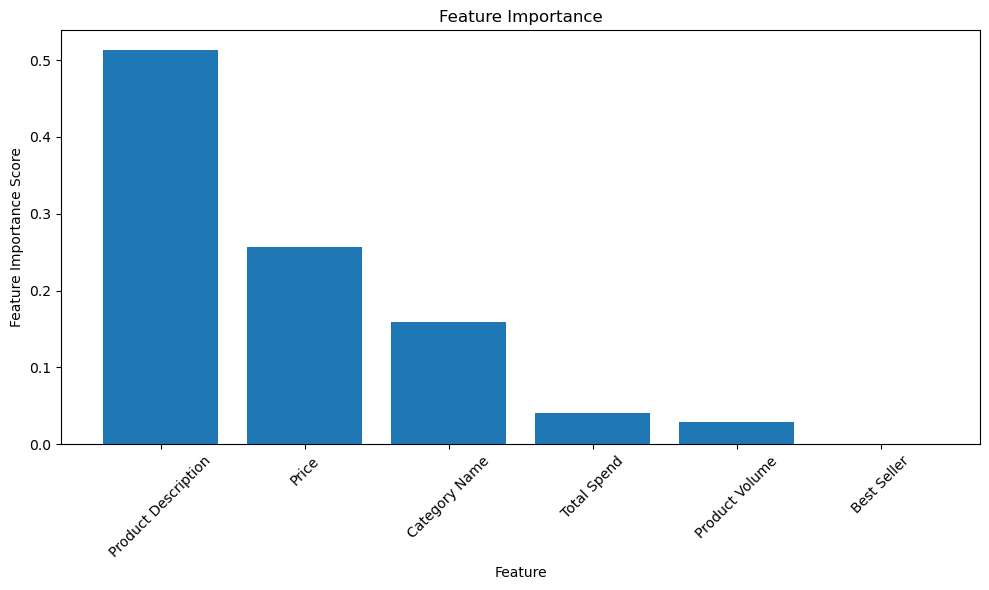

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance Score")
plt.tight_layout()
plt.show()